# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
from sklearn.model_selection import train_test_split as tts

In [10]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [38]:
from sklearn.linear_model import LinearRegression as LinReg

linreg = LinReg() # inicializamos

linreg.fit(X_train, y_train)

y_pred_linreg_test = linreg.predict(X_test)

y_pred_linreg_test[:10]

array([[1.40663277],
       [2.31736654],
       [1.55674642],
       [0.56158159],
       [3.25744048],
       [0.94231642],
       [2.52848479],
       [4.92535856],
       [2.02714572],
       [3.44978958]])

In [39]:
y_pred_linreg_train = linreg.predict(X_train)
y_pred_linreg_train

array([[2.25432539],
       [2.56522629],
       [1.00946933],
       ...,
       [1.54250864],
       [0.93404296],
       [1.20940473]])

## 3. Calculate and print R-squared for both the training and the testing set.

In [27]:
from sklearn.metrics import r2_score as r2

In [42]:
r2(y_train, y_pred_linreg_train)

0.6037314768620801

In [41]:
r2(y_test, y_pred_linreg_test)

0.6152711004615604

* A mayor valor de R2 mejor es el modelo. Resulta curioso que se de mayor (aunque por poco) valor de R2 para el test que para el train.

## 4. Calculate and print mean squared error for both the training and the testing set.

In [43]:
from sklearn.metrics import mean_squared_error as mse 

In [44]:
mse(y_train, y_pred_linreg_train, squared=False)

0.7247860902513888

In [45]:
mse(y_test, y_pred_linreg_test, squared=False)

0.7220099882201056

* Es menor el error en el test que en el train, curioso...

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [46]:
from sklearn.metrics import mean_absolute_error as mae

In [48]:
mae(y_train, y_pred_linreg_train)

0.5319163827801529

In [47]:
mae(y_test, y_pred_linreg_test)

0.5317263502515256

* Tal y como indica la teoría, el MAE es menor que el MSE. Sí que impresiona que el error sea mayor en el Train que en el Test, aunque sea por muy poco. Esperaríamos que el error fuera menor en los
datos sobre los que el modelo se ha entrenado.

## Classification Model Evaluation

In [49]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [51]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [54]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [68]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg_test = logreg.predict(X_test)

y_pred_logreg_train = logreg.predict(X_train)


c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jacom\anaconda3\envs\mlclase\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [69]:
logreg.score(X_train, y_train)  # accuracy, acierto

0.9666666666666667

In [70]:
logreg.score(X_test, y_test)  # accuracy, acierto

1.0

In [71]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred_logreg)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [72]:
from sklearn.metrics import balanced_accuracy_score as bas

In [74]:
bas(y_train, y_pred_logreg_train)

0.9664224664224664

In [75]:
bas(y_test, y_pred_logreg_test)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [78]:
from sklearn.metrics import precision_score as prec

prec(y_train, y_pred_logreg_train, average='micro')

0.9666666666666667

In [81]:
prec(y_test, y_pred_logreg_test, average='micro')

1.0

In [82]:
prec(y_train, y_pred_logreg_train, average='macro')

0.9682637182637183

In [84]:
prec(y_test, y_pred_logreg_test, average='macro')

1.0

In [85]:
prec(y_train, y_pred_logreg_train, average='weighted')

0.9673525798525799

In [86]:
prec(y_test, y_pred_logreg_test, average='weighted')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [87]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred_logreg, average='micro')

1.0

In [88]:
rec(y_test, y_pred_logreg_test, average='micro')

1.0

In [89]:
rec(y_train, y_pred_logreg_train, average='macro')

0.9664224664224664

In [90]:
prec(y_test, y_pred_logreg_test, average='macro')

1.0

In [91]:
rec(y_train, y_pred_logreg_train, average='weighted')

0.9666666666666667

In [92]:
rec(y_test, y_pred_logreg_test, average='weighted')

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [93]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_logreg, average='micro')

1.0

In [94]:
f1(y_test, y_pred_logreg_test, average='micro')

1.0

In [95]:
f1(y_train, y_pred_logreg_train, average='macro')

0.9669522643818849

In [96]:
f1(y_test, y_pred_logreg_test, average='macro')

1.0

In [98]:
f1(y_train, y_pred_logreg_train, average='weighted')

0.9666156670746634

In [99]:
f1(y_test, y_pred_logreg_test, average='weighted')

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [100]:
from sklearn.metrics import confusion_matrix as cm #importamos matriz de confusión

import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Tenemos que:
y_pred_logreg_train
y_pred_logreg_test

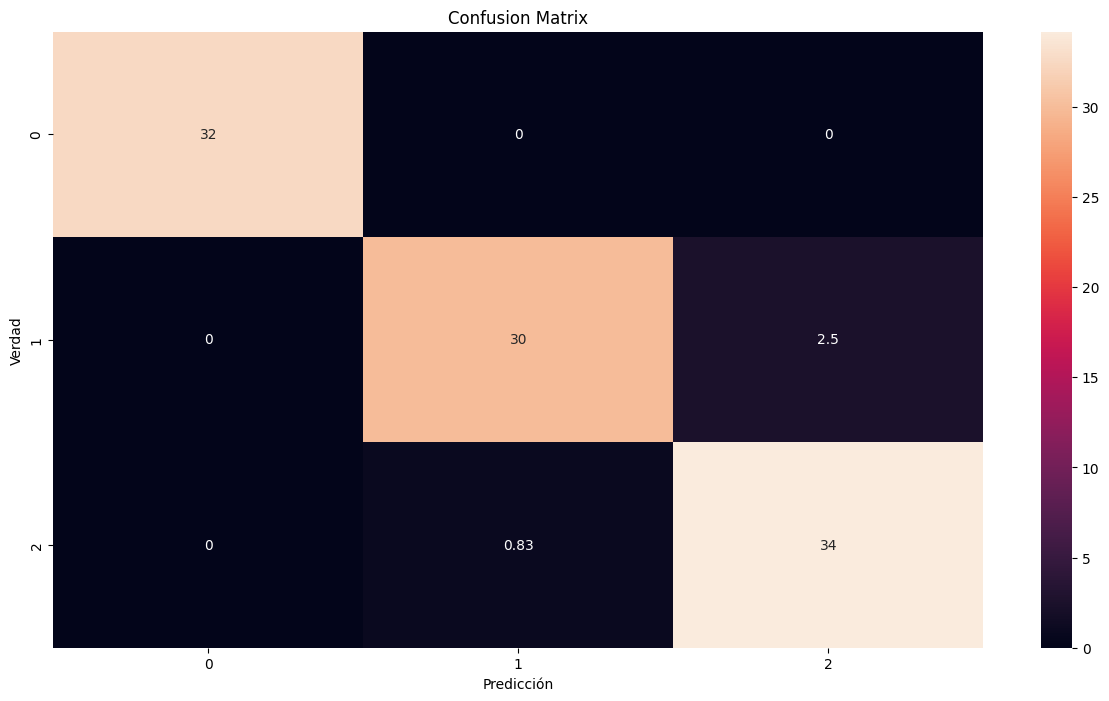

In [104]:
#Train
plt.figure(figsize=(15, 8)) # creamos un plot

ax=sns.heatmap(cm(y_train, y_pred_logreg_train)/cm(y_train, y_pred_logreg_train).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Verdad')
plt.xlabel('Predicción')
plt.show();

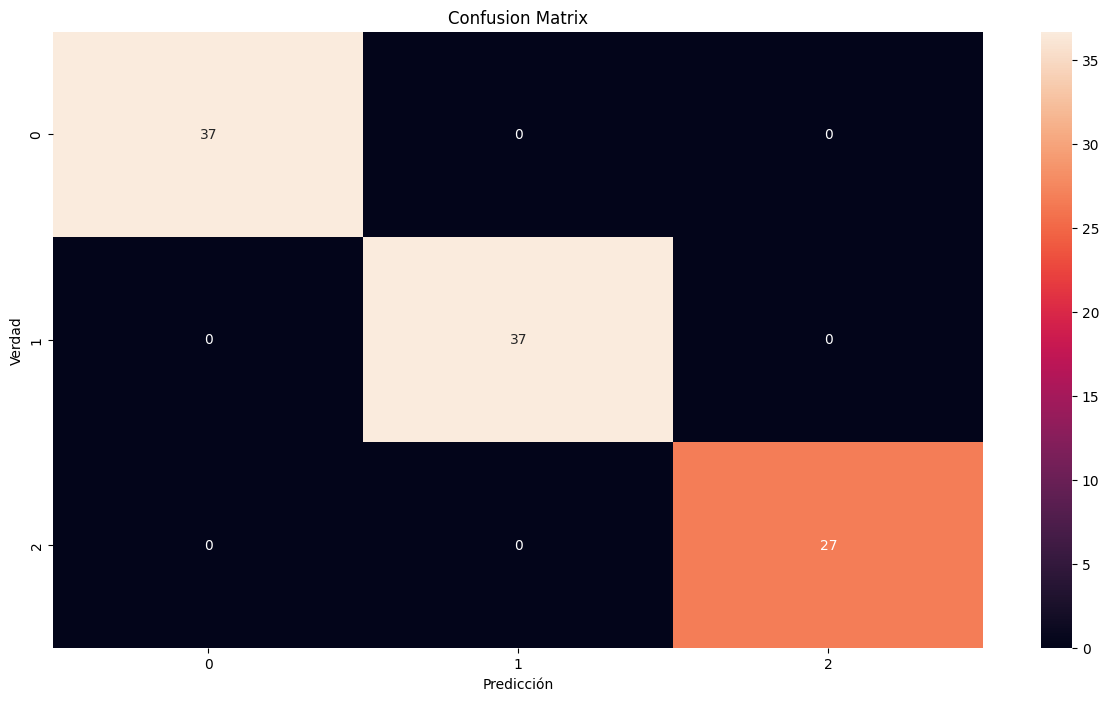

In [105]:
# Test
plt.figure(figsize=(15, 8)) # creamos un plot

ax=sns.heatmap(cm(y_test, y_pred_logreg_test)/cm(y_test, y_pred_logreg_test).sum() * 100, 
               annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Verdad')
plt.xlabel('Predicción')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.